# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [1]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

# Conjunto de datos de ejemplo

In [2]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]


In [3]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[01-23 18:35:26][INFO] 2025-01-23 18:35:26.868800
[01-23 18:35:27][INFO] 2025-01-23 18:35:27.108551
[01-23 18:35:27][INFO] Se ajustarán 2 parámetros.
[01-23 18:35:27][INFO] Matriz A:
[[101.8525926   0.       ]
 [  0.         10.       ]]
[01-23 18:35:27][INFO] Vector b:
[209.87476711 -11.7356    ]
[01-23 18:35:27][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]
[01-23 18:35:27][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[01-23 18:35:31][INFO] Se ajustarán 2 parámetros.
[01-23 18:35:31][INFO] Matriz A:
[[101.8525926   0.       ]
 [  0.         10.       ]]
[01-23 18:35:31][INFO] Vector b:
[209.87476711 -11.7356    ]
[01-23 18:35:31][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]
[01-23 18:35:31][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


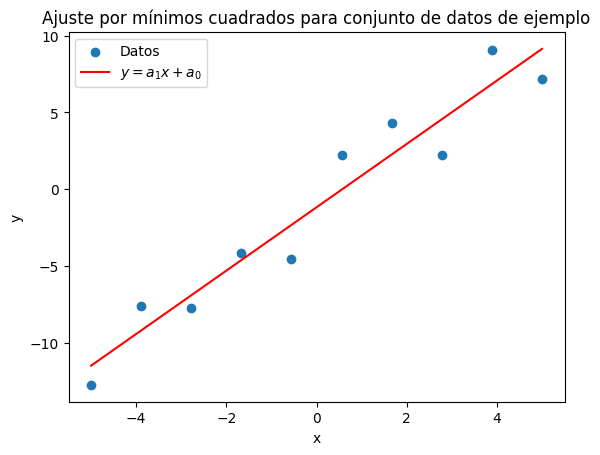

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

Interpole el conjunto de datos 1 usando la función cuadrática. 

In [5]:
# Datos de ejemplo
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

[01-23 18:35:37][INFO] Se ajustarán 3 parámetros.
[01-23 18:35:37][INFO] Matriz A:
[[1842.14567912    0.          101.8525926 ]
 [   0.          101.8525926     0.        ]
 [ 101.8525926     0.           10.        ]]
[01-23 18:35:37][INFO] Vector b:
[3664.25103454 -114.41357678  199.8089    ]
[01-23 18:35:37][INFO] 
[[ 1.84214568e+03  0.00000000e+00  1.01852593e+02  3.66425103e+03]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [ 0.00000000e+00  0.00000000e+00  4.36855036e+00 -2.78825181e+00]]
[01-23 18:35:37][INFO] 
[[ 1.84214568e+03  0.00000000e+00  1.01852593e+02  3.66425103e+03]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [ 0.00000000e+00  0.00000000e+00  4.36855036e+00 -2.78825181e+00]]
[01-23 18:35:37][INFO] 
[[ 1.84214568e+03  0.00000000e+00  1.01852593e+02  3.66425103e+03]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [ 0.00000000e+00  0.00000000e+00  4.36855036e+00 -2.78825181e+00]]
Coeficientes del polinomio

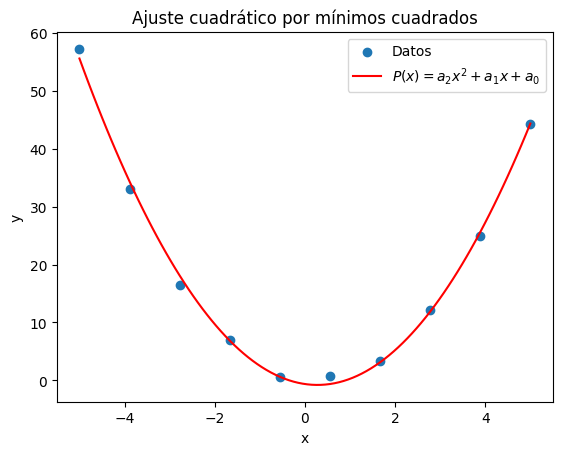

y(2.25) = 7.083
y(-2.25) = 12.138


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from src import ajustar_min_cuadrados

# Derivadas parciales para regresión cuadrática
def der_parcial_2(xs, ys):
    """
    Derivada parcial con respecto a a2 (coeficiente cuadrático).
    """
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(yi * xi**2 for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs, ys):
    """
    Derivada parcial con respecto a a1 (coeficiente lineal).
    """
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xi for xi in xs)
    c_ind = sum(yi * xi for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs, ys):
    """
    Derivada parcial con respecto a a0 (coeficiente constante).
    """
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xi for xi in xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)


# Ajustar modelo cuadrático
pars = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_2, der_parcial_1, der_parcial_0])

# Mostrar coeficientes
print("Coeficientes del polinomio:")
print(pars)

# Graficar
x = np.linspace(-5, 5, 100)
y = [pars[0] * xi ** 2 + pars[1] * xi + pars[2] for xi in x]

plt.scatter(xs1, ys1, label="Datos")
plt.plot(x, y, color="red", label=r"$P(x) = a_2x^2 + a_1x + a_0$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste cuadrático por mínimos cuadrados")
plt.legend()
plt.show()

# Cálculo de y(2.25) y y(-2.25)
y_2_25 = pars[0] * 2.25 ** 2 + pars[1] * 2.25 + pars[2]
y_neg_2_25 = pars[0] * (-2.25) ** 2 + pars[1] * (-2.25) + pars[2]

print(f"y(2.25) = {y_2_25:.3f}")
print(f"y(-2.25) = {y_neg_2_25:.3f}")

## Conjunto de datos 2

In [7]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

Interpole el conjunto de datos 2 usando la función exponencial. 

[01-23 18:36:28][INFO] Se ajustarán 2 parámetros.
[01-23 18:36:28][INFO] Matriz A:
[[34.82874178 22.0372    ]
 [22.0372     20.        ]]
[01-23 18:36:28][INFO] Vector b:
[35.94499705 19.05727035]
[01-23 18:36:28][INFO] 
[[34.82874178 22.0372     35.94499705]
 [ 0.          6.05639598 -3.68621817]]
[01-23 18:36:28][INFO] 
[[34.82874178 22.0372     35.94499705]
 [ 0.          6.05639598 -3.68621817]]
Coeficiente 'a': 4.125389199400044
Coeficiente 'b': 0.5440855388147082
y(5): 650.1174439111649
y(1): 2.2445646053759507


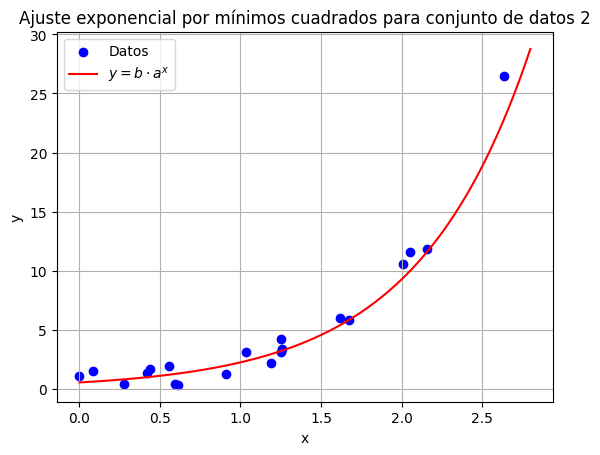

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from src import ajustar_min_cuadrados  # no modificar esta función

# Transformación logarítmica de los datos
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    log_ys = np.log(ys)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(log_ys)
    return (c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    log_ys = np.log(ys)
    c_1 = sum(xi * xi for xi in xs)
    c_0 = sum(xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, log_ys))
    return (c_1, c_0, c_ind)

# Ajuste por mínimos cuadrados
pars = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_0, der_parcial_1])

# Obtención de coeficientes finales
a_ln = pars[0]  # ln(a)
b_ln = pars[1]  # ln(b)

# Transformar de ln(a) y ln(b) a a y b
a = np.exp(a_ln)
b = np.exp(b_ln)

print(f"Coeficiente 'a': {a}")
print(f"Coeficiente 'b': {b}")

# Calcular los valores de y(5) y y(1)
y_5 = b * (a ** 5)
y_1 = b * (a ** 1)

print(f"y(5): {y_5}")
print(f"y(1): {y_1}")

# Gráfica
x = np.linspace(0, 2.8, 100)
y = [b * (a ** xi) for xi in x]

plt.scatter(xs2, ys2, label="Datos", color="blue")
plt.plot(x, y, color="red", label=r"$ y = b \cdot a^x $")
#plt.ylim(0, 30)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste exponencial por mínimos cuadrados para conjunto de datos 2")
plt.legend()
plt.grid()
plt.show()